# Movie Company Analysis for Microsoft New Venture

# Introduction

Microsoft  would like to get into the movie industry. They will be creating a  new movie studio,
however they have no knowledge of the movie industry. Our goal is to collect, clean, and analyze 
movie data from a variety of sources so that we can provide recommendations to Microsoft that 
will allow them to be successful in the movie industry.

# Objectives

1.What genres are the most successful, both in terms of audience rating and gross earnings?
2.What are the most profitable movies
3.What is the approximate budget and expected profit for certain movies

# 1.LOADING DATASET

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import csv

In [2]:
#loading data
bom_movie_gross=pd.read_csv(r"C:\Users\hp\Downloads\bom.movie_gross.csv.gz")
movie_budgets=pd.read_csv(r"C:\Users\hp\Downloads\tn.movie_budgets.csv.gz")
imdb_title_basics=pd.read_csv(r"C:\Users\hp\Downloads\imdb.title.basics.csv.gz")
imdb_title_ratings=pd.read_csv(r"C:\Users\hp\Downloads\imdb.title.ratings.csv.gz")

In [3]:
#checking the first 5 rows
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#checking information about the data
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Studio,domestic_gross and foreign_gross has missing values.Droping the foreign gross missing column is the best solution as the missing values are many

In [5]:
#checking the first 5 rows
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
#checking information about the data
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


For the movie_budgets dataset we have zero values in the data set

In [7]:
#checking the first 5 rows
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
#checking information about the data
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


original title,runtime minutes and genres have missing values.

In [9]:
#checking the first 5 rows
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
#checking information about the data
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


we have no missing values for this data set

# 2.EXPLORING THE DATA DISTIRBUTION

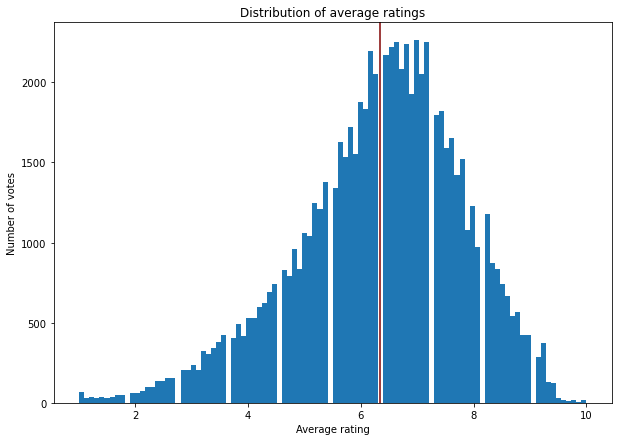

In [11]:
#Histogram to check how the average rating was distributed
def plot_histogram(df, column, title, xlabel, ylabel):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins="auto")
    # Plot vertical line
    ax.axvline(mean, color="maroon")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

plot_histogram(
    imdb_title_ratings,
    "averagerating",
    "Distribution of average ratings",
    "Average rating",
    "Number of votes"
)

In [12]:
#Mean,median and standard deviation of average rating
def print_stats(df, column):    
    print("Mean:              ", df[column].mean())
    print("Median:            ", df[column].median())
    print("Standard Deviation:", df[column].std())
    
print_stats(imdb_title_ratings, "averagerating")

Mean:               6.332728552859568
Median:             6.5
Standard Deviation: 1.4749783548957855


The  average rating histogram has a symmetrical distribution.But from the descriptive statistics
most genres seem to be below 6.5 of rating

In [13]:
#statistical description of the data
imdb_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [14]:
#statistical description of the data
bom_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [15]:
#statistical description of the data
movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [16]:
#statistical description of the data
imdb_title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


# 3.DATA CLEANING

In [17]:
#joining the two imdb dataframes
imdbjoint = imdb_title_basics.join(imdb_title_ratings.set_index('tconst'),
                                   how = 'inner', on = 'tconst', rsuffix = 'r')
imdbjoint.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [18]:
imdbjoint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 146134
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [19]:
#Drop records that have null values in the runtime_minutes column
imdbjoint.dropna(subset=['runtime_minutes'],inplace=True)
imdbjoint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66236 entries, 0 to 146134
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           66236 non-null  object 
 1   primary_title    66236 non-null  object 
 2   original_title   66236 non-null  object 
 3   start_year       66236 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    66236 non-null  float64
 7   numvotes         66236 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [20]:
#Drop records that have null values in the foreign_gross column considering that almost half of 
#the data is missing
bom_movie_gross.dropna(subset=['foreign_gross'],inplace=True)
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            2037 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.5+ KB


In [38]:
#separating year from the release date and changing it in to an integer
movie_budgets['year']=movie_budgets['release_date'].str[7:].astype(int)
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,2009,2.351345e+09,0.846921,573665000.0,3.173846e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,2011,6.350639e+08,0.607331,528113720.0,8.168192e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,2019,-2.002376e+08,-1.337036,361130000.0,-2.066052e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,2015,1.072414e+09,0.764364,383165400.0,1.242928e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,2017,9.997217e+08,0.759251,347241800.0,1.095095e+09


In [40]:
#removing comma and $ sign in worldwide_gross and changing it to a float
#movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '')
#movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')
#movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)

In [41]:
#removing comma and $ sign in domestic_gross and changing it to a integer
#movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',', '')
#movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '')
#movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(int)

In [42]:
#removing comma and $ sign in production_budget and changing it to a integer
#movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '')
#movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')
#movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(int)

In [43]:
#creating new column for profit and profit margin so as to know how much profit is for each movie
movie_budgets['Profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

movie_budgets['Profit_Margin'] = (movie_budgets['worldwide_gross'] - 
                                    movie_budgets['production_budget'])/movie_budgets['worldwide_gross']

In [44]:
#creating a new column with adjusted budget and profits putting inflation into consideration
#estimated inflation rate is 3.18%
movie_budgets['Adjusted_Budget'] = ((((2020-movie_budgets['year'])*.0318)+1)*
                                      movie_budgets['production_budget'])
movie_budgets['Adjusted_Profit'] = (((2020-movie_budgets['year'])*.0318)+1)*movie_budgets['Profit']
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,2009,2.351345e+09,0.846921,573665000.0,3.173846e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,2011,6.350639e+08,0.607331,528113720.0,8.168192e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,2019,-2.002376e+08,-1.337036,361130000.0,-2.066052e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,2015,1.072414e+09,0.764364,383165400.0,1.242928e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,2017,9.997217e+08,0.759251,347241800.0,1.095095e+09


In [45]:
#Finding the first 5 movies with highest adjusted profits
profitable_movies = movie_budgets.loc[movie_budgets['Profit'] > 0]
profitable_ranked = profitable_movies.sort_values(by=['Adjusted_Profit'], ascending=False)
profitable_ranked.reset_index(inplace=True)
profitable_ranked.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,1997,2.008208e+09,0.909429,346280000.0,3.477012e+09
1,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,2009,2.351345e+09,0.846921,573665000.0,3.173846e+09
2,5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,2015,1.747311e+09,0.850972,354654000.0,2.025134e+09
3,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,2018,1.748134e+09,0.853525,319080000.0,1.859316e+09
4,3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,7.865980e+08,1977,7.755980e+08,0.986016,26041400.0,1.836151e+09


In [28]:
imdbjoint=imdbjoint.assign(genres=imdbjoint['genres'].str.split(',')).explode('genres')
imdbjoint.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43


In [37]:
#droping the zero values in the domestic and worldwide gross
movie_budgets=movie_budgets[(movie_budgets.domestic_gross !=0)]
movie_budgets=movie_budgets[(movie_budgets.worldwide_gross !=0)]
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   int32  
 4   domestic_gross     5234 non-null   int32  
 5   worldwide_gross    5234 non-null   float64
 6   year               5234 non-null   int32  
 7   Profit             5234 non-null   float64
 8   Profit_Margin      5234 non-null   float64
 9   Adjusted_Budget    5234 non-null   float64
 10  Adjusted_Profit    5234 non-null   float64
dtypes: float64(5), int32(3), int64(1), object(2)
memory usage: 429.4+ KB


# 4.DATA VISUALIZATION

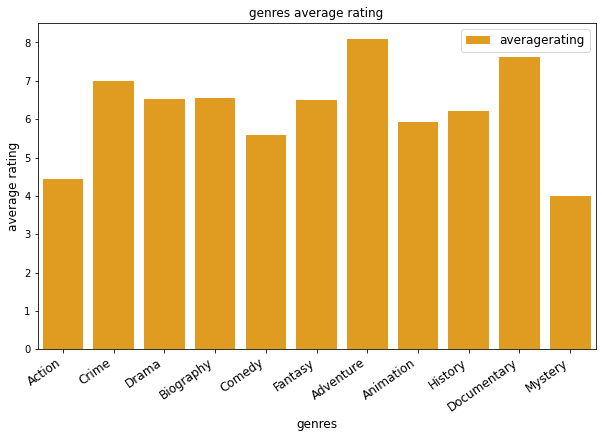

In [46]:
#plotting the genres vs there ratings
plt.figure(figsize=(10,6))
sns.barplot(x=imdbjoint.loc[0:25, 'genres'],y=imdbjoint.loc[0:25, 'averagerating'], 
            color='orange', label='averagerating', ci=None)
plt.xlabel('genres', fontsize=12)
plt.title("genres average rating", fontsize=12)
plt.ylabel('average rating', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('genres vs average rating');


From the data selected adventure genre is most liked as its average rating is 8 while mystery 
genre is least likes as its average rating is 4

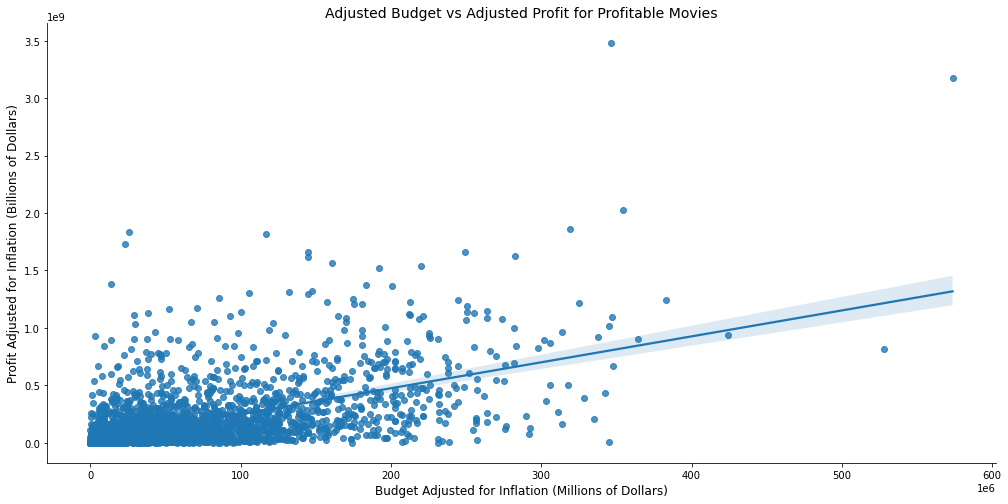

In [47]:
#determining the relationship between budget and profit
ax1 = sns.lmplot(x='Adjusted_Budget', y='Adjusted_Profit', data=profitable_ranked, height=7, aspect=2)
plt.xlabel('Budget Adjusted for Inflation (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Adjusted for Inflation (Billions of Dollars)', fontsize=12)
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies', fontsize=14)
plt.savefig('BudgetVProfit');

the data is weak positively correlated meaning that increase in budget does not necessarily mean increase in profits.we also have extreme outliers in the data set.

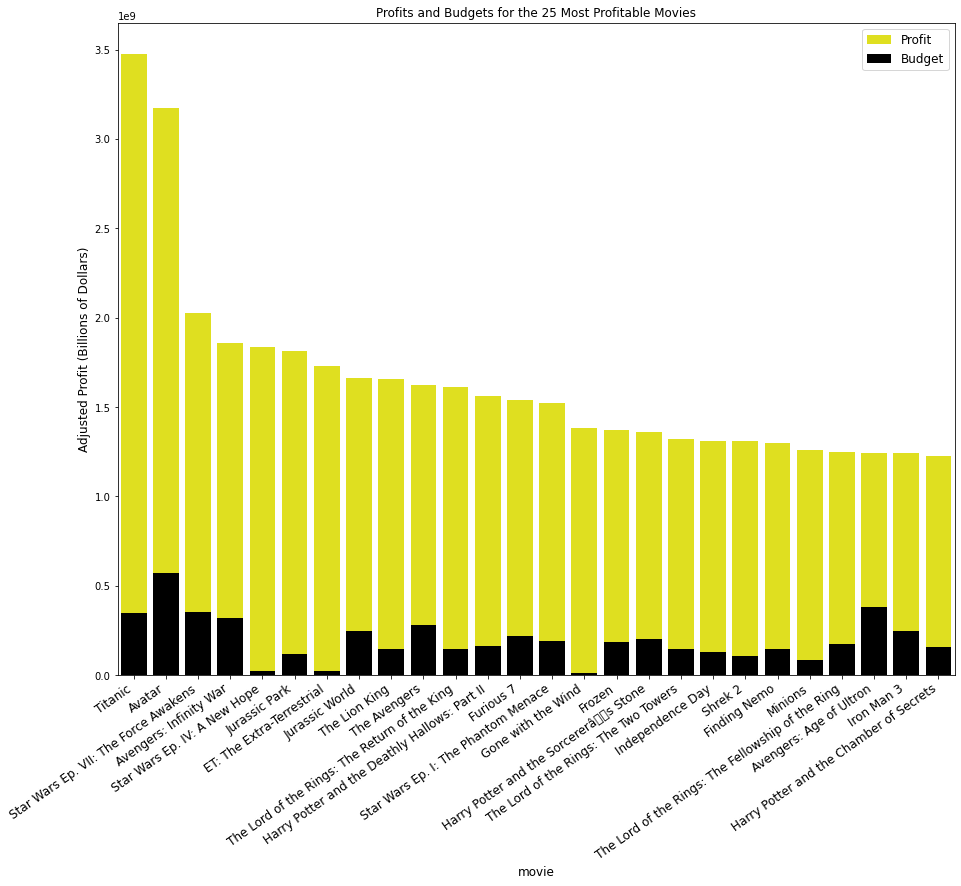

In [34]:
#plotting the 25 most profitable movies
plt.figure(figsize=(15,12))
sns.barplot(x=profitable_ranked.loc[0:25, 'movie'],y=profitable_ranked.loc[0:25, 'Adjusted_Profit'], 
            color='yellow', label='Profit', ci=None)
sns.barplot(x=profitable_ranked.loc[0:25, 'movie'],y=profitable_ranked.loc[0:25, 'Adjusted_Budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('movie', fontsize=12)
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontsize=12)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('ProfitBudgetTop25');

from this analysis we can see that we have outliers meaning that median will come in handy while 
analyzing the final budget.Also it does not mean that the higher the budget the higher the profit 
as we can see that som movies with low budget have higher profits.

In [32]:
import warnings

warnings.filterwarnings("ignore", message="Glyph 128 missing from current font.")
warnings.filterwarnings("ignore", message="Glyph 153 missing from current font.")

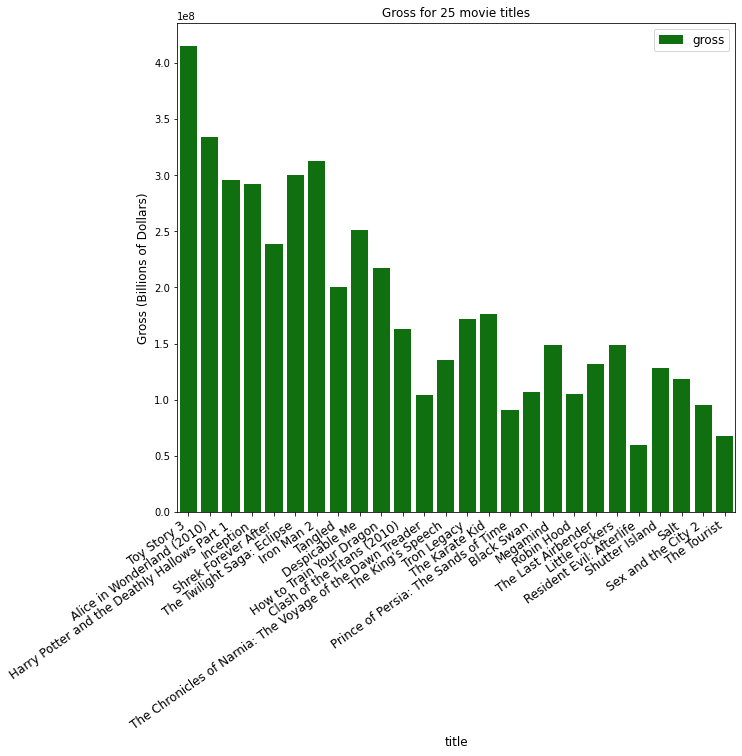

In [48]:
#plotting the domestic gross for 25 movies titles
plt.figure(figsize=(10,9))
sns.barplot(x=bom_movie_gross.loc[0:25, 'title'],y=bom_movie_gross.loc[0:25, 'domestic_gross'], 
            color='green', label='gross', ci=None)
plt.xlabel('title', fontsize=12)
plt.title("Gross for 25 movie titles", fontsize=12)
plt.ylabel('Gross (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('titlegross');

from the above analysis we can say that most movie titles have average domestic gross.